In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
%matplotlib inline

O que este notebook ira realizar:
---------------------------------

1. Analise dos resultados dos notebooks anteriores retirados do site da OLX
2. Selecionar apenas os anuncios de Casas
3. Agrupar os registros pelo bairro com a soma e media dos preços
4. Mostrar os dez maiores valores do agrupamento em grafico usando a biblioteca **Matplotlib**

In [113]:
df = pd.read_excel('../1-OLX_WebScrap/1_OLX_CASA_SEM_CEP.xlsx')

In [114]:
df.head()

,categoria,titulo,preco,href,zona,profissional,bairro
0,Casas,Você busca um região privilegiada para morar?,850000,http://sp.olx.com.br/sao-paulo-e-regiao/imovei...,Norte,False,Jardim São Paulo - Norte
1,Casas,Alugo Quarto Cozinha e Banheiro,550,http://sp.olx.com.br/sao-paulo-e-regiao/imovei...,Norte,False,Vila Guaca
2,Casas,Lindo Sobrado Fotos por WhatsApp,700000,http://sp.olx.com.br/sao-paulo-e-regiao/imovei...,Norte,False,Vila Mazzei
3,Casas,Casa,1500,http://sp.olx.com.br/sao-paulo-e-regiao/imovei...,Norte,True,Vila Mazzei
4,Casas,"Casa no Tucuruvi, 3 quartos sendo 1 suíte",700000,http://sp.olx.com.br/sao-paulo-e-regiao/imovei...,Norte,False,Parada Inglesa


In [115]:
df = df[['bairro', 'categoria', 'preco']]

In [116]:
df.loc[:,['categoria']] = df['categoria'].astype('category')
df.loc[:,['preco']] = df['preco'].astype(float)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4498 entries, 0 to 4497
Data columns (total 3 columns):
bairro       4498 non-null object
categoria    4498 non-null category
preco        4498 non-null float64
dtypes: category(1), float64(1), object(1)
memory usage: 109.9+ KB


In [118]:
df.groupby(['categoria'])['preco'].count()

categoria
Casas    4498
Name: preco, dtype: int64

In [119]:
df.categoria.unique()

[Casas]
Categories (1, object): [Casas]

In [120]:
#seleciona apenas a coluna bairro e preço
df = df[['bairro', 'preco']]

In [121]:
#cria um data frame com a soma dos precos dos bairros
df_soma = df.groupby(['bairro'], as_index=False)['preco'].sum()
#ordena o DataFrame pelo preco descendente
df_soma = df_soma.sort_values(by='preco',ascending=False)
#Reseta o index do DataFrame
df_soma = df_soma.reset_index(drop='index')

In [122]:
df_soma

,bairro,preco
0,Jardim América,76235000.0
1,Alto De Pinheiros,63060390.0
2,Tucuruvi,57502350.0
3,Tremembé,56092449.0
4,Jardim Europa,54700000.0
5,Vila Ré,53240550.0
6,Santana,52205338.0
7,Jardim Paulista,47840000.0
8,Jardim Russo,47113650.0
9,Vila Albertina,38142000.0


In [123]:
#cria um data frame com a media dos precos dos bairros
df_media = df.groupby(['bairro'], as_index=False)['preco'].mean()
#ordena o DataFrame pela media de preco descendente
df_media = df_media.sort_values(by='preco',ascending=False)
#Reseta o index do DataFrame
df_media = df_media.reset_index(drop='index')

In [124]:
#dataframe com a contagem de registros por bairro
df_count = df.groupby(['bairro'], as_index=False)['preco'].count()
df_count.columns = ['bairro', 'count']
#ordena o DataFrame pela contagem descendente
df_count = df_count.sort_values(by='count',ascending=False)
#Reseta o index do DataFrame
df_count = df_count.reset_index(drop='index')

In [125]:
#Seleciona os dez primeiros bairros da soma de preços
df_soma_dez = df_soma.head(10)

In [126]:
#Seleciona os dez primeiros bairros da media de preços
df_media_dez = df_media.head(10)

In [127]:
df_count_dez = df_count.head(10)

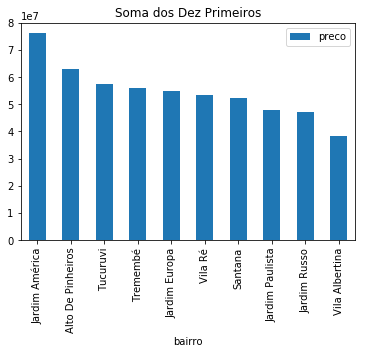

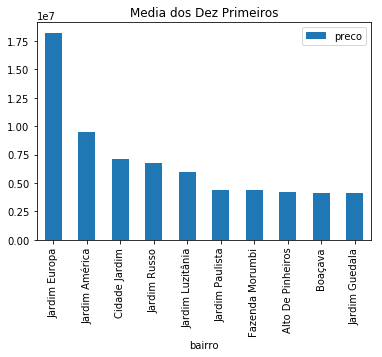

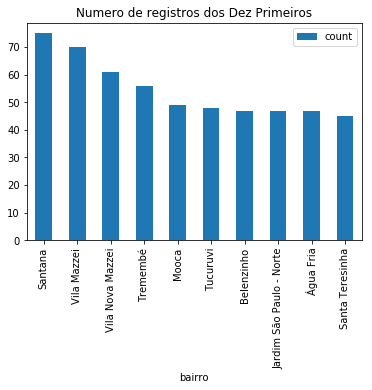

In [128]:
#Graficos da soma e media dos dez bairros mais caros, respectivamente
df_soma_dez.plot.bar(x=df_soma_dez['bairro'],title='Soma dos Dez Primeiros')

df_media_dez.plot.bar(x=df_media_dez['bairro'],title='Media dos Dez Primeiros')

df_count_dez.plot.bar(x=df_count_dez['bairro'], title='Numero de registros dos Dez Primeiros')

In [130]:
df_count[df_count['bairro'] == 'Santana']

,bairro,count
0,Santana,75
